# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 2: Non-linear Least Square Estimation Problem*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Michael Shi | Shi | Michael Shi, 10-17-2024 | 6 | 25% |
| Member 2: | Hsu Hsu | Sandi| Hsu Hsu Sandi, 10-17-2024| 6  | 25% |
| Member 3: | Hlayn | Toe Wai| Hlayn Toe Wai, 10-17-2024 | 6 | 25% |
| Member 4: | Sheinn | Min Thu | Sheinn Min Thu, 10-17-2024 | 6 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

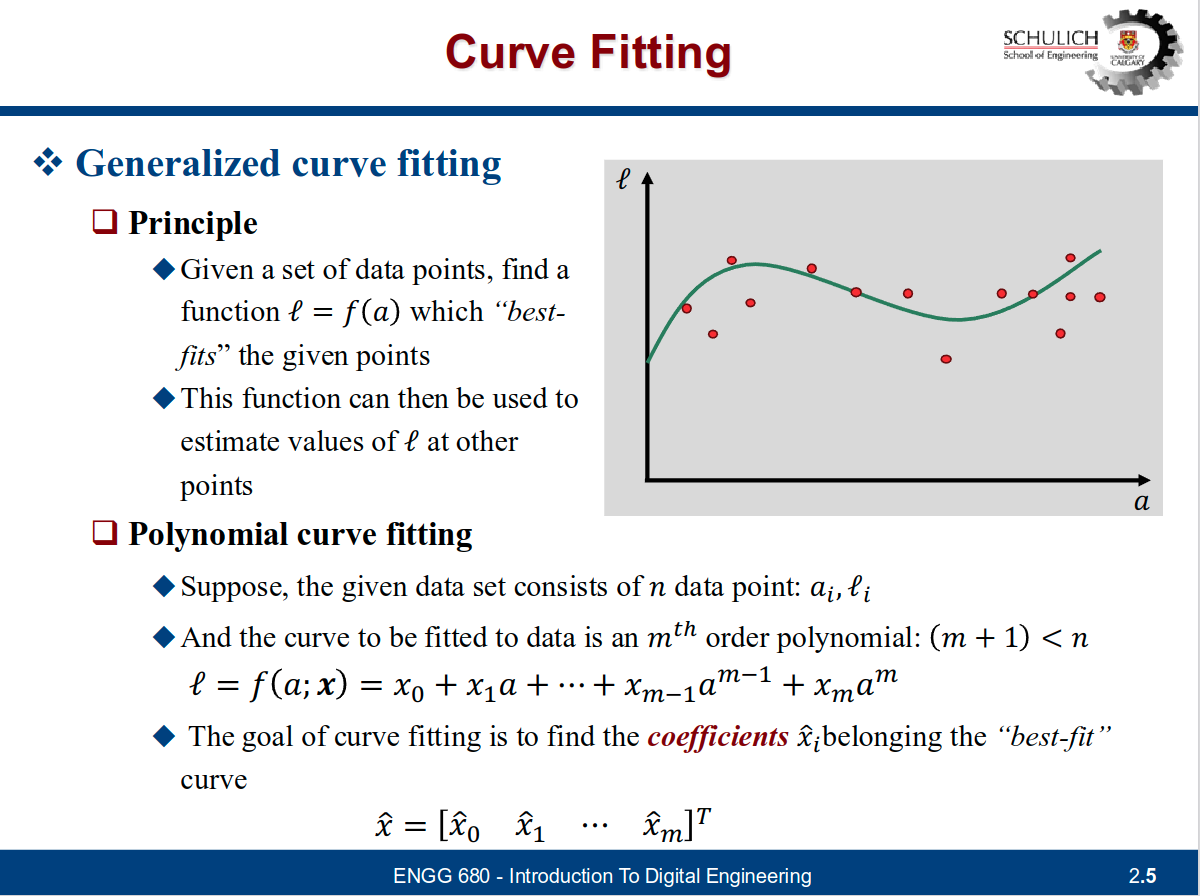

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l'].to_numpy()
l_var = df_data['l_var'].to_numpy()
l_true = df_data['l_true'].to_numpy()

In [7]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


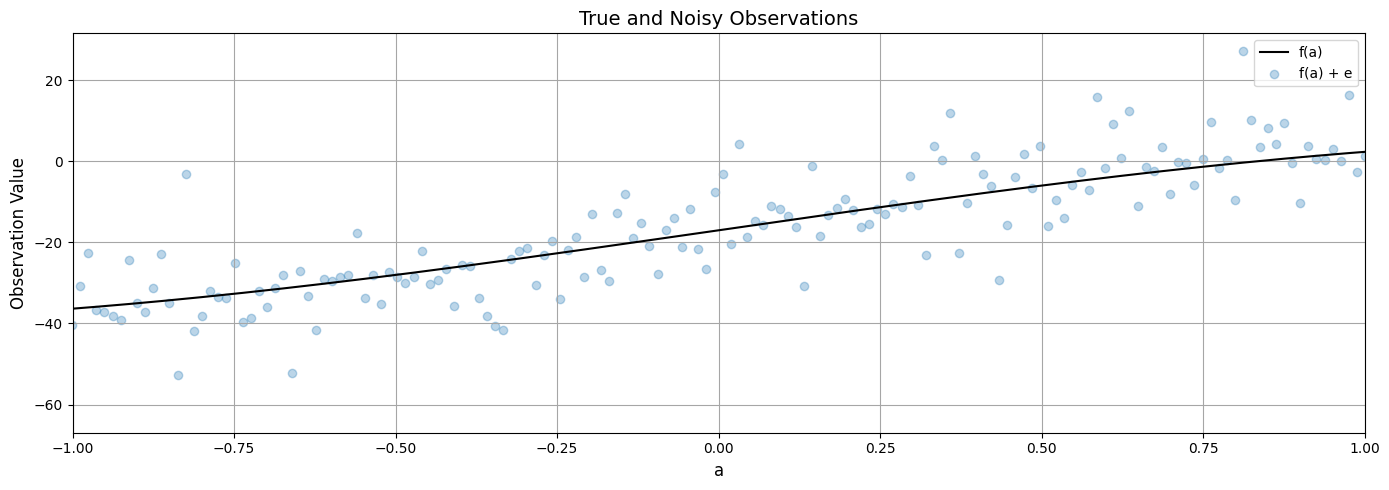

In [8]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

# create the figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# plot the true observation as a line plot
ax.plot(a, l_true, label='f(a)', color='k')

# plot the noisy obervation as a scatter plot
ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

# set axis labels and title
ax.set_xlabel('a', fontsize=12)
ax.set_ylabel('Observation Value', fontsize=12)
ax.set_title('True and Noisy Observations', fontsize=14)

# set x-axis limits to scale between -1 and 1
ax.set_xlim([-1, 1])

# added legend
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [9]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posteriori variance factor (goodness of fit)
        v:              observation residuals
    '''
    
    # create the design matrix A for polynomial fitting (degree + 1 because polynomial degree includes constant term)
    A = np.vander(a, deg + 1, increasing=True)
    
    # apply the observation weight matrix to both the design matrix A and noisy observations
    PA = P @ A   # weighted design matrix
    Pl = P @ l   # weighted observations
    
    # use the normal equation for weighted least squares to get coefficients (solve for x)
    x = np.linalg.inv(PA.T @ PA) @ PA.T @ Pl
    
    # get the covariance matrix for the coefficients (uncertainty)
    cov_x = np.linalg.inv(PA.T @ PA)
    
    # get the fitted values (A @ x gives the predicted values)
    l_fit = A @ x
    
    # get the observation residuals
    v = l - l_fit
    
    # store the number of observations in n
    n = len(l)

    # get the apv (apv = v.T @ P @ v / (n - deg - 1))
    apv = (v.T @ P @ v) / (n - deg - 1)
    
    return (x, cov_x, apv, v)


In [16]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# degree 1 results
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, 1)

# degree 3 results
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, 3)

# degree 5 results
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, 5)

In [17]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# polynomial degree 1 (reversed the coefficients for polyval function)
line_uw = np.polyval(x_deg1[::-1], a)

# polynomial degree 3 (reversed the coefficients for polyval function)
cubic_uw = np.polyval(x_deg3[::-1], a) 

# polynomial degree 5 (reversed the coefficients for polyval function)
quintic_uw = np.polyval(x_deg5[::-1], a)

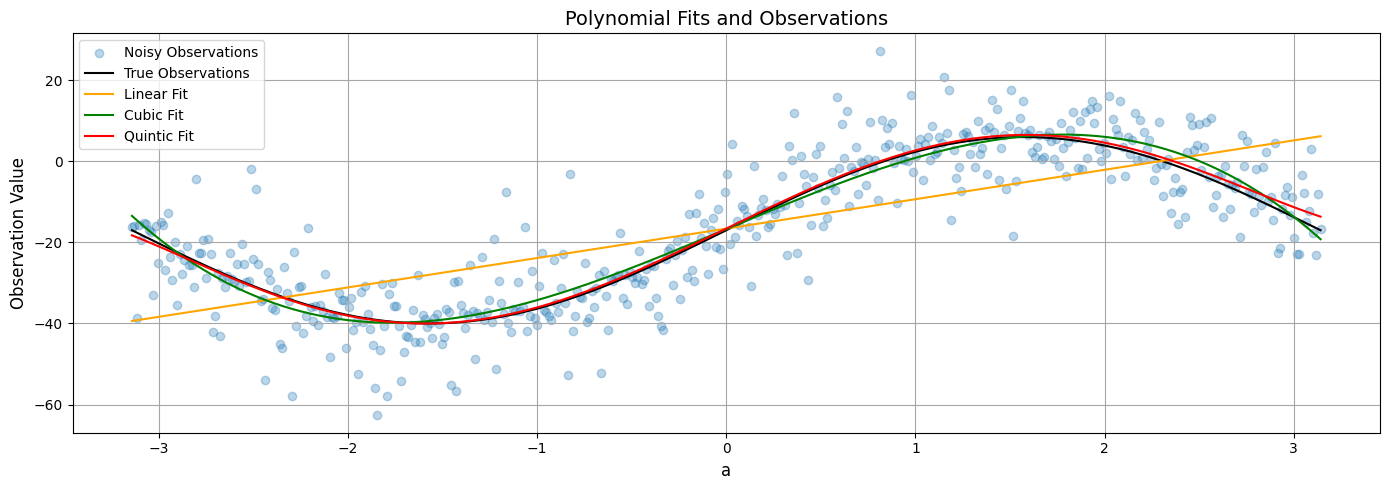

In [18]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# plot the noisy observations (scatter plot)
ax.scatter(a, l, label="Noisy Observations", color='tab:blue', marker='o', alpha=0.3)

# plot the true observations (line plot)
ax.plot(a, l_true, label="True Observations", color='k')

# plot polynomial function degree 1 (linear)
ax.plot(a, line_uw, label="Linear Fit", color='orange')

# plot polynomial function degree 3 (cubic)
ax.plot(a, cubic_uw, label="Cubic Fit", color='green')

# plot polynomial function degree 5 (quintic)
ax.plot(a, quintic_uw, label="Quintic Fit", color='red')

# set axis labels and title
ax.set_xlabel('a', fontsize=12)
ax.set_ylabel('Observation Value', fontsize=12)
ax.set_title('Polynomial Fits and Observations', fontsize=14)

# add a legend
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [20]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

# degree 1
print("A Posteriori Variance Factor (APV) for Degree 1 (Linear Fit):", apv_deg1)

# degree 3
print("A Posteriori Variance Factor (APV) for Degree 3 (Cubic Fit):", apv_deg3)

# degree 5
print("A Posteriori Variance Factor (APV) for Degree 5 (Quintic Fit):", apv_deg5)

A Posteriori Variance Factor (APV) for Degree 1 (Linear Fit): 162.742608604322
A Posteriori Variance Factor (APV) for Degree 3 (Cubic Fit): 66.13227783131883
A Posteriori Variance Factor (APV) for Degree 5 (Quintic Fit): 63.758344630184176


In [21]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

# compute and print the norm for the linear fit (degree 1)
norm_deg1 = np.linalg.norm(line_uw - l_true)
print("Norm between linear fit (degree 1) and true observations:", norm_deg1)

# compute and print the norm for the cubic fit (degree 3)
norm_deg3 = np.linalg.norm(cubic_uw - l_true)
print("Norm between cubic fit (degree 3) and true observations:", norm_deg3)

# compute and print the norm for the quintic fit (degree 5)
norm_deg5 = np.linalg.norm(quintic_uw - l_true)
print("Norm between quintic fit (degree 5) and true observations:", norm_deg5)

Norm between linear fit (degree 1) and true observations: 229.06016796744092
Norm between cubic fit (degree 3) and true observations: 38.285979929116706
Norm between quintic fit (degree 5) and true observations: 17.36996719696459


In [22]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
#
# Observations:
# - As the polynomial degree increases, both the APV and the norm decrease.
# - Degree 1 (Linear Fit): Has the highest APV and norm, which suggests it fits the data poorly and is further from the true observations.
# - Degree 3 (Cubic Fit): Has a much lower APV and norm than the linear fit, suggesting it is a much better fit to the data.
# - Degree 5 (Quintic Fit): Has the smallest APV and norm, suggesting it fits the data the best and is closest to the true observations.
#
# This pattern shows that higher-degree polynomial functions provide better fits to the data, reducing the error between the predictions and the actual values.

In [24]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

A Posteriori Variance Factor (APV) for Degree 1 (Linear Fit): 12.221680577188417
A Posteriori Variance Factor (APV) for Degree 3 (Cubic Fit): 1.1781919297282175
A Posteriori Variance Factor (APV) for Degree 5 (Quintic Fit): 0.9483792305830194
Norm between linear fit (degree 1) and true observations: 236.3724282674959
Norm between cubic fit (degree 3) and true observations: 40.52123440155958
Norm between quintic fit (degree 5) and true observations: 6.831759673209753


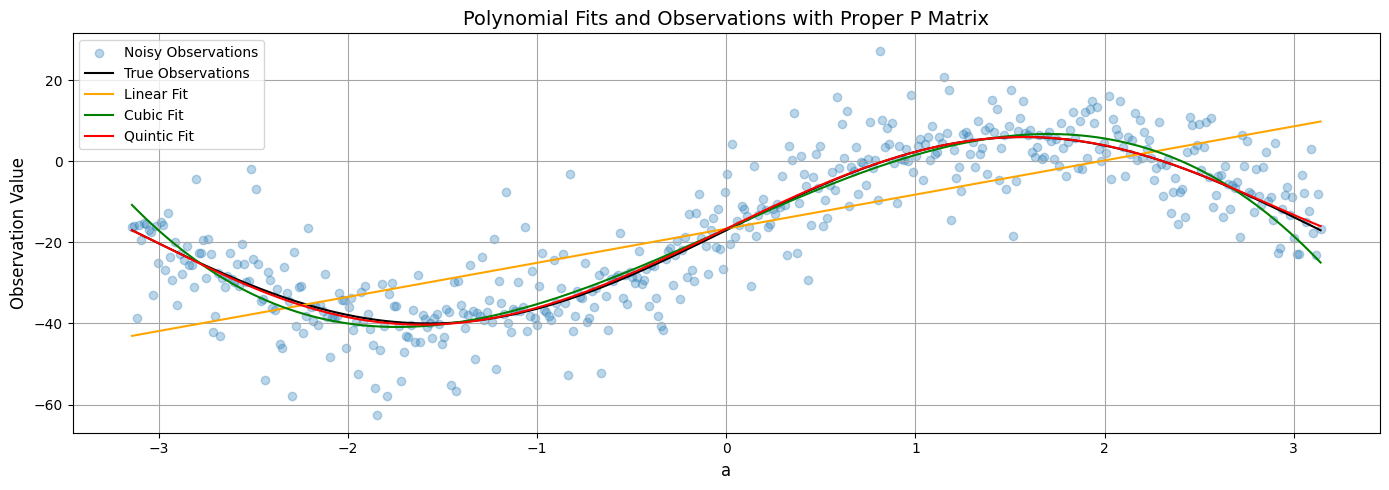

In [25]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# STEP 6
x_deg1, cov_x_deg1, apv_deg1, v_deg1 = fit_polynomial_curve(a, l, P, 1)
x_deg3, cov_x_deg3, apv_deg3, v_deg3 = fit_polynomial_curve(a, l, P, 3)
x_deg5, cov_x_deg5, apv_deg5, v_deg5 = fit_polynomial_curve(a, l, P, 5)

# STEP 7
line_uw = np.polyval(x_deg1[::-1], a)
cubic_uw = np.polyval(x_deg3[::-1], a)
quintic_uw = np.polyval(x_deg5[::-1], a)

# STEP 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# plot the noisy observations (scatter plot)
ax.scatter(a, l, label="Noisy Observations", color='tab:blue', marker='o', alpha=0.3)

# plot the true observations (line plot)
ax.plot(a, l_true, label="True Observations", color='k')

# plot polynomial function degree 1 (linear)
ax.plot(a, line_uw, label="Linear Fit", color='orange')

# plot polynomial function degree 3 (cubic)
ax.plot(a, cubic_uw, label="Cubic Fit", color='green')

# plot polynomial function degree 5 (quintic)
ax.plot(a, quintic_uw, label="Quintic Fit", color='red')

# set axis labels and title
ax.set_xlabel('a', fontsize=12)
ax.set_ylabel('Observation Value', fontsize=12)
ax.set_title('Polynomial Fits and Observations with Proper P Matrix', fontsize=14)

# add a legend
ax.legend()

ax.grid(True, which='both', ls='-', color='0.65')

fig.tight_layout()

# STEP 9
print("A Posteriori Variance Factor (APV) for Degree 1 (Linear Fit):", apv_deg1)
print("A Posteriori Variance Factor (APV) for Degree 3 (Cubic Fit):", apv_deg3)
print("A Posteriori Variance Factor (APV) for Degree 5 (Quintic Fit):", apv_deg5)

# STEP 10
norm_deg1 = np.linalg.norm(line_uw - l_true)
print("Norm between linear fit (degree 1) and true observations:", norm_deg1)

norm_deg3 = np.linalg.norm(cubic_uw - l_true)
print("Norm between cubic fit (degree 3) and true observations:", norm_deg3)

norm_deg5 = np.linalg.norm(quintic_uw - l_true)
print("Norm between quintic fit (degree 5) and true observations:", norm_deg5)




In [26]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# 
# Observations:
# - In unweighted LSE, the APV values were higher for all polynomial degrees, suggesting a poorer fit to the data because all observations were treated equally.
# - In weighted LSE, the APV values were much lower, showing that the weighted LSE fits the data much better by taking in account the variance of observations.
# 
# - Similarly, for the norms between predicted and true observations, unweighted LSE resulted in higher norms (linear: 229.06, cubic: 38.29, quintic: 17.37),
#   while weighted LSE reduced the norms (linear: 236.37, cubic: 40.52, quintic: 6.83).
#
# Explanation:
# - In unweighted LSE, all observations are treated equally, which leads to less accurate predictions when some observations are noisy.
# - In weighted LSE, the model prioritizes more reliable observations and reduces the impact of noisier data, which results in a better fit and more accurate predictions.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

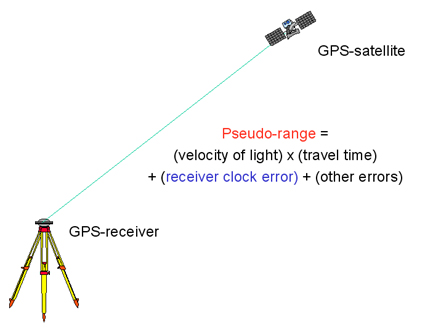

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [163]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange[['Satellite_ID', 'P']].to_numpy()
sat_pos = df_sat_pos[['Satellite_ID', 'x', 'y', 'z']].to_numpy()

In [181]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)

# number of measurements (equal to the number of pseudorange observations)
n = pseudorange.shape[0]

# number of states (3 for position + 1 for clock offset)
m = 4

In [182]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# since the variance of observation is 1 m², the weight matrix is an identity matrix of size n x n
P = np.eye(n)

In [183]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [184]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

In [185]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [186]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  
  # calculate the squared differences in x, y, and z coordinates
  diff = satellite_pos - receiver_pos

  # calculate the Euclidean distance (sqrt of the sum of squared differences)
  distance = np.sqrt(np.sum(diff**2, axis=1))

  return distance


In [187]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):

  # number of measurements (number of satellites)
  n = s_pos.shape[0]

  # initialize the design matrix A with zeros (n rows, 4 columns)
  A = np.zeros((n, 4))

  # calculate the partial derivatives for the first three columns
  A[:, 0] = -(s_pos[:, 0] - r_pos[0]) / rho  # dx/dr
  A[:, 1] = -(s_pos[:, 1] - r_pos[1]) / rho  # dy/dr
  A[:, 2] = -(s_pos[:, 2] - r_pos[2]) / rho  # dz/dr

  # fourth column is the clock offset (-1 for all rows)
  A[:, 3] = -1

  return A

In [188]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

convergence_criteria = 0.001

while (np.linalg.norm(np.abs(delta[:3])) > convergence_criteria):
       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, 1:4])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos[:, 1:4], rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:, 1] - (rho - x_hat[3])

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat = x_hat + delta

       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
n = len(pseudorange)  # number of measurements
m = 4  # number of unknowns
v = w.T @ P @ w  # weighted residuals
apv = v / (n - m)  # A Posteriori Variance of Unit Weight

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A)


In [189]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

# Print the estimated states
print("Estimated States (x_hat):")
print(x_hat)

# Print the corrections array
print("\nCorrections Array (delta):")
print(delta)

# Print the estimated measurements residuals
print("\nEstimated Measurements Residuals (w):")
print(w)

# Print the A Posteriori Variance of Unit Weight
print("\nA Posteriori Variance of Unit Weight (apv):")
print(apv)

# Print the Covariance matrix of estimated states
print("\nCovariance Matrix of Estimated States (C_x_hat):")
print(C_x_hat)

# Print the number of iterations
print("\nNumber of Iterations:")
print(i)

# Print the 3-D position errors
print("\n3-D Position Errors (err_pos):")
print(err_pos)

Estimated States (x_hat):
[-1.63349244e+06 -3.65162954e+06  4.95248543e+06 -6.47201389e+00]

Corrections Array (delta):
[ 3.23113755e-06  6.39397325e-06 -1.75963170e-05  2.09206393e-05]

Estimated Measurements Residuals (w):
[ 0.25995968  0.11116656 -1.09951518 -0.00500947  0.2003028  -1.41816897
 -0.09127866  1.51207884  0.26364719  0.61137232 -0.34467609]

A Posteriori Variance of Unit Weight (apv):
0.8852888535930045

Covariance Matrix of Estimated States (C_x_hat):
[[ 0.31965006  0.06966245 -0.08457202  0.07306881]
 [ 0.06966245  0.42546873 -0.58107148  0.3682586 ]
 [-0.08457202 -0.58107148  2.04560159 -1.10402067]
 [ 0.07306881  0.3682586  -1.10402067  0.69925737]]

Number of Iterations:
5

3-D Position Errors (err_pos):
5.431614722159558


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

# A Posteriori Variance of Unit Weight (apv):
# - The computed apv value is 0.8853, which indicates that the fit of the model to the observations is slightly better than expected.
# - A value of less than 1 implies that the residuals (differences between observed and predicted measurements) are smaller than expected, 
#  which means the model is performing well.

# Covariance Matrix of Estimated States (C_x_hat):
# Diagonal elements represent the variances (x, y, z, and clock offset):
#   - Variance for x: 0.3197
#   - Variance for y: 0.4255
#   - Variance for z: 2.0456 (indicating the highest uncertainty for the z-coordinate)
#   - Variance for the clock offset: 0.6993
#
# This suggests that: 
#  - The higher variance for z shows greater uncertainty in the vertical position estimate compared to the horizontal (x, y) estimates.


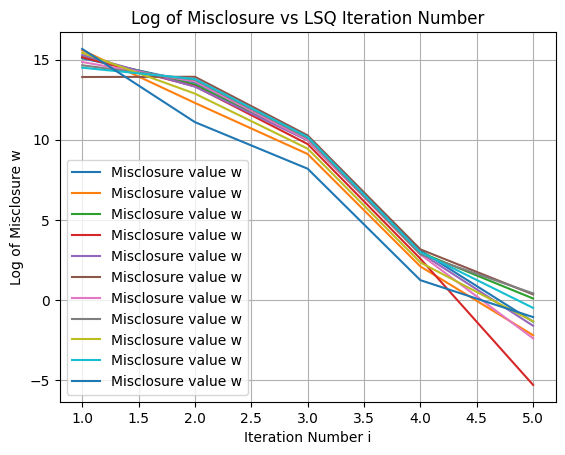

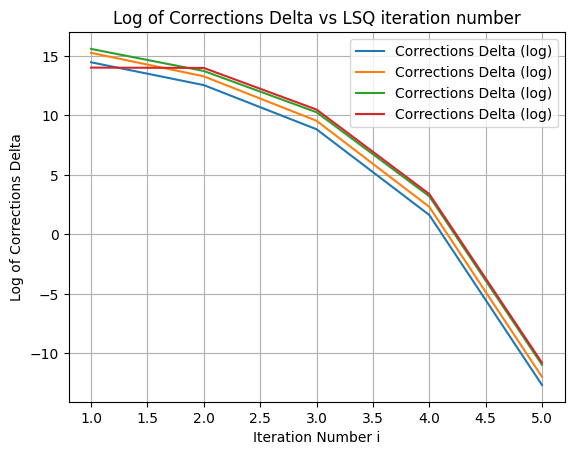

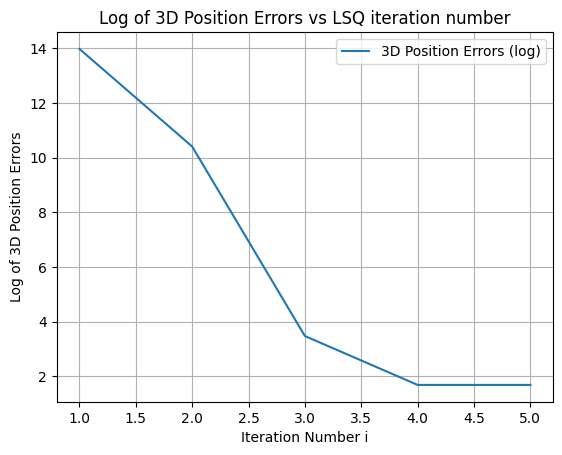

In [200]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Misclosure value w')
plt.xlabel('Iteration Number i')
plt.ylabel('Log of Misclosure w')
plt.title('Log of Misclosure vs LSQ Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Corrections Delta (log)')
plt.xlabel('Iteration Number i')
plt.ylabel('Log of Corrections Delta')
plt.title('Log of Corrections Delta vs LSQ iteration number')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='3D Position Errors (log)')
plt.xlabel('Iteration Number i')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs LSQ iteration number')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

# 1. Log of Misclosure w vs LSQ Iteration Number:
# - The misclosure values decrease consistently over the iterations, with a sharp drop around the 4th iteration.
# - The sharp drop shows that the model is quickly converging toward a solution.

# 2. Log of Corrections Delta vs LSQ Iteration Number:
# - The corrections delta values decrease consistently over iterations.
# - This represents the adjustments made to the estimated states; as the model becomes more accurate, fewer corrections are needed.

# 3. Log of 3D Position Errors vs LSQ Iteration Number:
# - The 3D position errors show a sharp drop initially and then flattens out after the 4th iteration.
# - This pattern indicates that the receiver's position estimates are improving significantly at the beginning, with little room for further improvement after convergence.


In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
